# <u>Machine Learning Engineer Nanodegree</u>  
## Capstone Project: Google Stock Price Prediction with Deep Learning Models
Masaharu KINOSHITA  
e-mail: <k.masaharu0219@gmail.com>  
LinkedIn: [masaharu kinoshita](https://www.linkedin.com/in/masaharu-kinoshita/) *I prefer linkedin for communication with you.  
Apr, 2019  
project specifications: [review points](https://review.udacity.com/#!/rubrics/108/view)

## <u>Agenda</u>
**#1. Definition** ------- How do I establish this Problem?  
**#2. Analysis** -------- How do I define problem solving and design my approach?  
**#3. Methodology** -- How do I conduct this approach in terms of data science?  
**#4. Results** -------- What do my approach result in?  
**#5. Conclusions**

---
## <u>#1. Definition</u>
### 1-1. Project Overview:
In this proposal, in order to verify how useful CNN is to solve time-series prediction problem, CNN, LSTM, and CNN+LSTM are build on stock datasets of Google obtained at [kaggle](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs). As you know, CNN is mainly used in the field of Image Recognition so far. CNN, however, has recently been said to be a valid method to solve time-series forecasting problem. [*1](https://www.researchgate.net/publication/328445708_CNNPred_CNN-based_stock_market_prediction_using_several_data_sources) [,2](https://www.ai-gakkai.or.jp/jsai2017/webprogram/2017/pdf/1112.pdf). In order to show that RNN, LSTM, and CNN+LSTM models are build on the google stock datasets and their score on the test datasets are compared with benchmark score of RNN, which is often used for time-series data, with MSE.  

### 1-2. Problem Statement: 
In this proposal, usability of deep learning, especially CNN as an feature extractor, is verified. Although CNN is known to be valid in the field of Image Recognition, few use-case of CNN are applied to finance problem, such as stock price predictions. This is because a lot of Algorithm Trading has employed technical index so far. These index, however, are commonly used and developed by humans. So, it can be said that there is some room to improve Trading Algorithm.  
In this context, applying CNN to the finance problem and validation of its usefulness is meaningful as CNN has high potential to recognize patterns in given dataset and computational power has advanced so far.  
In order to valid the usefulness of LSTM and CNN+LSTM are compared to the stock price predictions with metrics MSE. In addition to this, RNN is set as base-models. By comparing the four models with MSE, the usefulness of CNN are verified in the stock price problem.  

### 1-3. Metrics: 
As mentioned above, MSE is evaluation metrics. Needless to say, less MSE is better for stock price prediction. The reasons of employing MSE in this problem are the followings.  
First, the target value, which is daily close stock price, is continuous. So, this is regression problem.  
Second, more penalty is added to larger error with MSE compared to MAE by employing squared value.  
Therefore, MSE is employed as evaluation metrics.  
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

---
## <u>#2. Analysis</u>

In [232]:
# import libraries
import os
import time
import datetime
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display as p
%matplotlib inline
warnings.filterwarnings('ignore')
base_path = os.getcwd()

### 2-1. Data Exploration
In this problem, google stock price datasets obtained [kaggle](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs) are used. Stock datasets from 2014-03-27 to 2017-05-01 are used as train datasets. Stock datasets from 2017-05-01 to 2017-11-10 are used as test datasets.  
**1. train.csv**  
- number of rows: 780
- number of columns: 6  

**2. test.csv**  
- number of rows: 137
- number of columns: 6

**3. columns and data types**
- Date: date, index
- Open: float, feature
- High: float, feature
- Low: float, feature
- Volume: float, feature
- Close: float, target

In [185]:
# load stock datasets of google
## set file names:
train_name = 'train.csv'
test_name = 'test.csv'

## read data:
df_train = pd.read_csv(os.path.join(base_path,'input', train_name))
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train = df_train.set_index('Date')
df_test = pd.read_csv(os.path.join(base_path, 'input', test_name))
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

## shapes of train and test datasets:
print('Train datasets: ', df_train.shape)
print('Test datasets: ', df_test.shape)

y_train, y_test = df_train['Close'], df_test['Close']
X_train, X_test = df_train.drop('Close', axis=1), df_test.drop('Close', axis=1)

## data types of datasets: 
print('---'*25)
print('dtypes of datasets: ')
print(df_train.info())

## heads of train and test datasets:
print('---'*25)
print('Train datasets:')
p(df_train.head())
print('Test datasets: ')
p(df_test.head())

## basic statistic info of datasets:
print('---'*25)
print('basic statistic of datasets: ')
print(X_train.describe())

Train datasets:  (780, 5)
Test datasets:  (137, 5)
---------------------------------------------------------------------------
dtypes of datasets: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 2014-03-27 to 2017-05-01
Data columns (total 5 columns):
Open      780 non-null float64
High      780 non-null float64
Low       780 non-null float64
Close     780 non-null float64
Volume    780 non-null int64
dtypes: float64(4), int64(1)
memory usage: 36.6 KB
None
---------------------------------------------------------------------------
Train datasets:


,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,568.00,568.00,552.92,558.46,13052
2014-03-28,561.20,566.43,558.67,559.99,41003
2014-03-31,566.89,567.00,556.93,556.97,10772
2014-04-01,558.71,568.45,558.71,567.16,7932
2014-04-02,599.99,604.83,562.19,567.00,146697


Test datasets: 


,Open,High,Low,Close,Volume
Date,,,,,
2017-05-01,901.94,915.68,901.450,912.57,2115701
2017-05-02,909.62,920.77,909.453,916.44,1545245
2017-05-03,914.86,928.10,912.543,927.04,1498051
2017-05-04,926.07,935.93,924.590,931.66,1421984
2017-05-05,933.54,934.90,925.200,927.13,1911275


---------------------------------------------------------------------------
basic statistic of datasets: 
             Open        High         Low        Volume
count  780.000000  780.000000  780.000000  7.800000e+02
mean   659.798927  664.838887  654.095332  1.762739e+06
std    108.205845  108.556833  108.148483  9.887431e+05
min    494.650000  495.980000  487.560000  7.932000e+03
25%    550.000000  554.580000  544.177500  1.192554e+06
50%    660.105000  664.985000  653.235000  1.552158e+06
75%    757.755000  765.305000  750.522750  2.050637e+06
max    910.660000  916.850000  905.770000  1.116490e+07


### 2-2. Exploratory Visualization
In this section, the Close Price of train and test datasets, which is target value, are visualized. As shown below, the Close price of google are increasing from 2014-03-27 to 2017-11-10. 

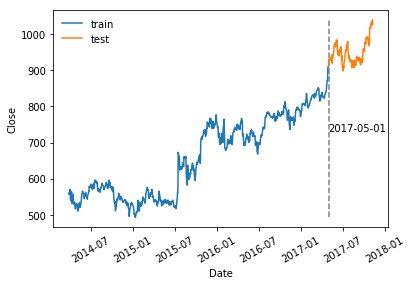

In [195]:
# visualization of train and test target datasets
plt.plot(X_train.index, y_train, label='train')
plt.plot(X_test.index, y_test, label='test')

plt.vlines(X_train.index.max(), ymin=y_train.min(), ymax=y_test.max(), linestyles='--', colors='gray')
plt.text(X_train.index.max(), y_train.max()*4/5, X_train.index.max().strftime('%Y-%m-%d'), fontsize=10)
plt.xlabel('Date'); plt.ylabel('Close'); plt.title('The Close Price of Google from 2014-03-27 to 2017-11-10')
plt.xticks(rotation=30)
plt.legend(loc='best', frameon=False)
plt.savefig('./img/'+'close_price_plot.png')
plt.show()

### 2-3. Algorithms and Techniques
In this paper, deep learning models performing well for time-series predictions, [RNN, LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), CNN+LSTM, are used because the Close Price are relevant with the past stock information, which is our input data such as Open, High, Low, Volume columns. By applying RNN, LSTM, CNN+LSTM models to this time-series forecasting problem, how useful CNN is to solve time-series prediction problem is verified. 

- **What is RNN?**  
xxx
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" width=50%>
- **What is LSTM?**  
xxx  
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width=50%>
- **What is CNN?**  
xxx  


### 2-4. Benchmark
In this problem, RNN model is build to get base MSE as benchmark model. RNN, one of the famous deep learning models, is often used for time-series forecasting. This is an usual score with conventional method employing deep learning. As mentioned above, the metrics with which the benchmark model is measured is also MSE. 

As described more in the next section 'Methodology', the benchmark MSE socre obtained by RNN with 7 layers composed of 6 simple-RNNs and 1 Dense layer is **0.00171**. This value is the benchmark MSE score. As you may know, the smaller, the better. 

---
# <u>#3. Methodology</u>
### 3-1. Data Preprocessing
In this section, preprocessing approaches, hold-out and normalization, are explained. 

In this problem, the original datasets are split into train and test datasets so that deep learning models can aquire generalized performance. This technique is known as hold-out. The usual test datasets ratio may be 20%, however, in this case, test datasets ratio is 15% because given datasets are not so enough that deep learning model learn from that. 

As for normalization, it is conducted within window datasets. More concretely speaking, window datasets values are devided by the value of its first index, 0. After do that, the values devided are minus 1 in order to set the value range from -1.0 to 1.0. This noramlization allows my deep learning models to learn more first and get properly regularization term effect. Actually, in this paper, no regularization approch are employed because this don't meet my goal which is to verify CNN potential for time-series forecasting.  In this time, 10 is employed for the window length. 

In [233]:
# preprocessing: normalization
## set window size
window = 10

## train data noromalization
X_train_scls, y_train_scls= [], []
for i in range(X_train.shape[0] - window):
    X_tmp = X_train.iloc[i:i+window].copy()
    # normalized by first day in its window and minus 1 in order to set the value range at [-1., 1.]
    X_tmp = X_tmp/X_tmp.iloc[0] - 1
    X_train_scls.append(X_tmp)

## test data noromalization
X_test_scls, y_test_scls= [], []
for i in range(X_test.shape[0] - window):
    X_tmp = X_test.iloc[i:i+window].copy()
    # normalized by first day in its window and minus 1 in order to set the value range at [-1., 1.]
    X_tmp = X_tmp/X_tmp.iloc[0] - 1
    X_test_scls.append(X_tmp)

X_train_fin = np.array([np.array(X_train_scl) for X_train_scl in X_train_scls])
y_train_fin = (y_train[window:].values / y_train[:-window].values) - 1

X_test_fin = np.array([np.array(X_test_scl) for X_test_scl in X_test_scls])
y_test_fin = (y_test[window:].values / y_test[:-window].values) - 1
print('X_train shape: ', X_train_fin.shape)
print('y_train shape: ', y_train_fin.shape)

X_train shape:  (770, 10, 4)
y_train shape:  (770,)


### 3-2. Implementation
The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented.  
As for metics, MSE are employed in order to give more penalty on larger error compared to MAE because it employs squared value. 

As for deep learning models, models performing well on a time-series problem are selected. As mentioned above, RNN is employed as benchmark model. It has been widely used for time-series prediction problem so far. According the convention, RNN is selected and RNN network with 7 layers composed of 6 RNN layers and 1 Dence is epmployed as the benchmark model and trained on those datasets with 'adam' optimizer.  

As for optimizer, **['adam'](https://arxiv.org/pdf/1412.6980.pdf)** is used in this paper. Adam is a popular algorithm in the field of deep learning because it achieves good results fast.In the original paper, Adam was demonstrated empirically to show that convergence meets the expectations of the theoretical analysis. Adam was applied to the logistic regression algorithm on the MNIST character recognition and IMDB sentiment analysis datasets, a Multilayer Perceptron algorithm on the MNIST dataset and Convolutional Neural Networks on the CIFAR-10 image recognition dataset.   

How does adam work? Adam is different from classical stochastic gradient descent. SGD maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. In contrast to this, adam realizes the benefits of both AdaGrad and RMSProp. 
- **Adaptive Gradient Algorithm (AdaGrad)** that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).  
- **Root Mean Square Propagation (RMSProp)** that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).


Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).
Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

All of the deep learning models used in this paper are trained with adam otimizer. However, RNN model reaches the limit at about 0.0017 MSE on the test datasets although layers are stacked and increase number of epoch. As it is shown in the learning curve, RNN's curve reach the limit.  

### 3-3. Refinement
So, LSTM which has capability to learn logn-term dependencies are employed as second deep leanring model. LSTM model is composed of 7layers which are 6 layers LSTM and 1 Dense layer as the same as RNN.  

After trainig, LSTM performs better on the test datasets than RNN and it achieves 0.00024 MSE in comparision with 0.017, benchmark score of RNN.  
LSTM, however, takes long time to learn from the datasets because LSTM learn sequentially. Now, it takes about 196 sec. In the real business, time is also important in addition to prediction ability.  

Lastly, 1-dimentional-CNN+LSTM is employed as the third deep learning model to predict as well as LSTM model and save learning time. As the same as the above two kinds of deep learning models, 1d-CNN+LSTM model is composed of 7 layers with 2 CNN layers, 4 LSTM layers and 1 Dense layers. After 1d-CNN+LSTM is trained, it is confirmed that its loss, MSE, is 0.00024 which is the same as the LSTM model and the training time  is 134 sec which is shorter by 32 % than LSTM which takes 196 sec to learn from training datasets.  

On top of that, recurrent dropout are employed especially for 1d-CNN+LSTM to acquire generalization performance. In this technique, it is well known that the popular dropout rate is set up at 50%. It may be good. In this paper, however, some knowledge obtained from my data scientist friends who is kaggler are employed for the strategy of setting dropout rate. What he said is that it is better to decrease the dropout rate with increasing layers because deep learning model is getting more abstract representation and it is needless to set 50%. Actually, this is rule of thumb, but it is valuable to try this technique to build deep learning model by myself.  

As a result, 1d-CNN+LSTM realize perform as well as LSTM and better than benchmark model, RNN. In addition to this, the learning time of 1d-CNN+LSTM model is the shortest amongst the three models. 

In [289]:
# build model
from keras.models import Sequential
from keras.layers import Conv1D, RNN, SimpleRNN, LSTM, Dense, Dropout, MaxPooling1D, InputLayer, GlobalMaxPool1D

## set parameters
step_size = 10
input_size = 4
num_epochs = 40

## benchmark model; RNN 
def build_rnn(input_shape=(step_size, input_size), loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(16, input_shape=(step_size, input_size), return_sequences=True))
    model.add(SimpleRNN(16, input_shape=(step_size, input_size), return_sequences=True))
    model.add(SimpleRNN(16, input_shape=(step_size, input_size), return_sequences=True))
    model.add(SimpleRNN(16, input_shape=(step_size, input_size), return_sequences=True))
    model.add(SimpleRNN(16, input_shape=(step_size, input_size), return_sequences=True))
    model.add(SimpleRNN(16, input_shape=(step_size, input_size), return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    print('---'*25)
    print('rnn architecture: ')
    print(model.summary())
    print('\n')
    return model

## LSTM
def build_lstm(input_shape=(step_size, input_size), loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(16, input_shape=(step_size, input_size), return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=True))
    model.add(LSTM(16, return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    print('---'*25)
    print('lstm architecture: ')
    print(model.summary())
    print('\n')
    return model

## CNN+LSTM
def build_cnn_lstm(input_shape=(step_size, input_size), loss='mean_squared_error', optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(3))
#     model.add(Dropout(.5))
    model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(3))
#     model.add(Dropout(.4))
    model.add(LSTM(16, recurrent_dropout=.5, return_sequences=True))
    model.add(LSTM(16, recurrent_dropout=.4, return_sequences=True))
    model.add(LSTM(16, recurrent_dropout=.3, return_sequences=True))
    model.add(LSTM(16, recurrent_dropout=.2, return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    print('---'*25)
    print('cnn+lstm architecture: ')
    print(model.summary())
    print('\n')
    return model

In [290]:
# compile RNN
rnn = build_rnn(input_shape=(step_size, input_size))

# compile LSTM
lstm = build_lstm(input_shape=(step_size, input_size))

# compile CNN+LSTM
cnn_lstm = build_cnn_lstm(input_shape=(step_size, input_size))

---------------------------------------------------------------------------
rnn architecture: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_261 (SimpleRNN)   (None, 10, 16)            336       
_________________________________________________________________
simple_rnn_262 (SimpleRNN)   (None, 10, 16)            528       
_________________________________________________________________
simple_rnn_263 (SimpleRNN)   (None, 10, 16)            528       
_________________________________________________________________
simple_rnn_264 (SimpleRNN)   (None, 10, 16)            528       
_________________________________________________________________
simple_rnn_265 (SimpleRNN)   (None, 10, 16)            528       
_________________________________________________________________
simple_rnn_266 (SimpleRNN)   (None, 16)                528       
_______________________________________________

In [291]:
# deep learning models training: 
## RNN trianing:
print('RNN training...')
start = time.time()
hist_rnn = rnn.fit(X_train_fin, y_train_fin, epochs=num_epochs, validation_data=(X_test_fin, y_test_fin))
elapsed_time_rnn = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time_rnn) + "[sec]")
print('\n')

## LSTM trianing:
print('LSTM training...')
start = time.time()
hist_lstm = lstm.fit(X_train_fin, y_train_fin, epochs=num_epochs, validation_data=(X_test_fin, y_test_fin))
elapsed_time_lstm = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time_lstm) + "[sec]")
print('\n')

## CNN+LSTM trianing:
print('CNN+LSTM training...')
start = time.time()
hist_cnn_lstm = cnn_lstm.fit(X_train_fin, y_train_fin, epochs=num_epochs, validation_data=(X_test_fin, y_test_fin))
elapsed_time_cnn_lstm = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time_cnn_lstm) + "[sec]")

RNN training...
Train on 770 samples, validate on 127 samples
Epoch 1/40
770/770 [==============================] - 96s 125ms/step - loss: 0.0758 - mean_absolute_error: 0.1970 - val_loss: 0.0212 - val_mean_absolute_error: 0.1187
Epoch 2/40
770/770 [==============================] - 1s 1ms/step - loss: 0.0208 - mean_absolute_error: 0.1013 - val_loss: 0.0134 - val_mean_absolute_error: 0.0783
Epoch 3/40
770/770 [==============================] - 1s 1ms/step - loss: 0.0116 - mean_absolute_error: 0.0751 - val_loss: 0.0080 - val_mean_absolute_error: 0.0683
Epoch 4/40
770/770 [==============================] - 1s 1ms/step - loss: 0.0075 - mean_absolute_error: 0.0605 - val_loss: 0.0055 - val_mean_absolute_error: 0.0541
Epoch 5/40
770/770 [==============================] - 1s 1ms/step - loss: 0.0059 - mean_absolute_error: 0.0540 - val_loss: 0.0054 - val_mean_absolute_error: 0.0555
Epoch 6/40
770/770 [==============================] - 1s 1ms/step - loss: 0.0049 - mean_absolute_error: 0.0513 - va

770/770 [==============================] - 2s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0259 - val_loss: 7.0472e-04 - val_mean_absolute_error: 0.0224
Epoch 10/40
770/770 [==============================] - 2s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0256 - val_loss: 6.5271e-04 - val_mean_absolute_error: 0.0214
Epoch 11/40
770/770 [==============================] - 2s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0248 - val_loss: 5.8320e-04 - val_mean_absolute_error: 0.0200
Epoch 12/40
770/770 [==============================] - 2s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0240 - val_loss: 5.6682e-04 - val_mean_absolute_error: 0.0199
Epoch 13/40
770/770 [==============================] - 2s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0232 - val_loss: 4.7424e-04 - val_mean_absolute_error: 0.0178
Epoch 14/40
770/770 [==============================] - 2s 3ms/step - loss: 9.4476e-04 - mean_absolute_error: 0.0219 - val_loss: 4.7416e-04 - val_mean_absolute_error: 0

770/770 [==============================] - 1s 1ms/step - loss: 4.8281e-04 - mean_absolute_error: 0.0166 - val_loss: 3.1970e-04 - val_mean_absolute_error: 0.0142
Epoch 17/40
770/770 [==============================] - 1s 1ms/step - loss: 4.8522e-04 - mean_absolute_error: 0.0167 - val_loss: 3.0561e-04 - val_mean_absolute_error: 0.0140
Epoch 18/40
770/770 [==============================] - 1s 1ms/step - loss: 4.3345e-04 - mean_absolute_error: 0.0157 - val_loss: 3.1681e-04 - val_mean_absolute_error: 0.0145
Epoch 19/40
770/770 [==============================] - 1s 1ms/step - loss: 4.2281e-04 - mean_absolute_error: 0.0156 - val_loss: 2.8256e-04 - val_mean_absolute_error: 0.0135
Epoch 20/40
770/770 [==============================] - 1s 1ms/step - loss: 4.4170e-04 - mean_absolute_error: 0.0160 - val_loss: 3.1479e-04 - val_mean_absolute_error: 0.0146
Epoch 21/40
770/770 [==============================] - 1s 1ms/step - loss: 4.1381e-04 - mean_absolute_error: 0.0154 - val_loss: 2.9527e-04 - val_me

RNN


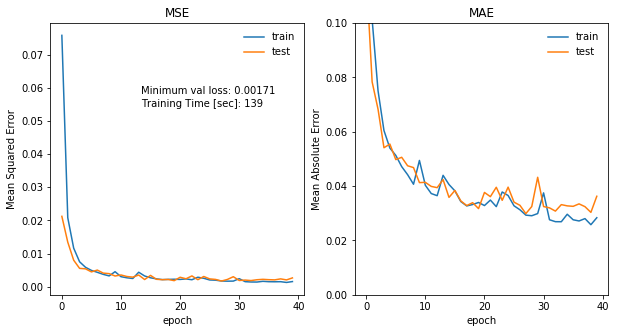

Minimum val MSE: 0.00171
Minimum val MAE: 0.02987
------------------------------------------------------------------------------------------
LSTM


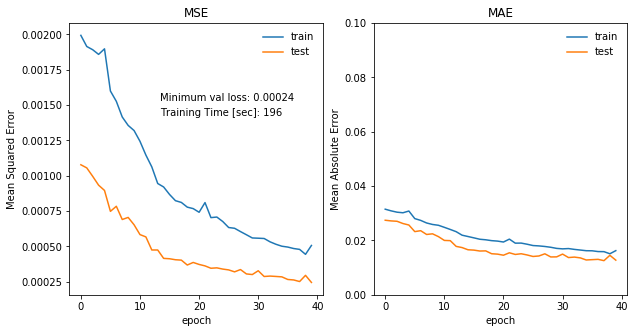

Minimum val MSE: 0.00024
Minimum val MAE: 0.01256
------------------------------------------------------------------------------------------
CNN+LSTM


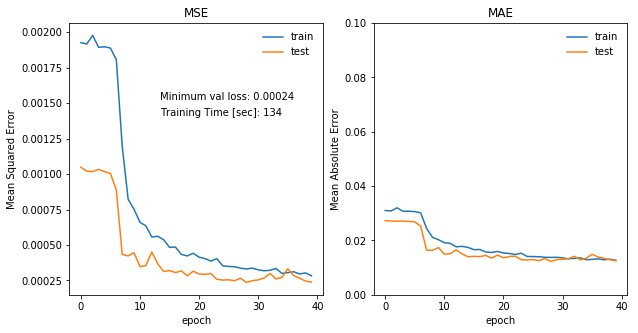

Minimum val MSE: 0.00024
Minimum val MAE: 0.01234
------------------------------------------------------------------------------------------


In [398]:
# visualize learning curve
history_dict = {'rnn':hist_rnn, 'lstm':hist_lstm, 'cnn+lstm':hist_cnn_lstm}
elapsed_time_dict = {'rnn':elapsed_time_rnn, 'lstm':elapsed_time_lstm, 'cnn+lstm':elapsed_time_cnn_lstm}
for key, hist_value in history_dict.items():
    print(key.upper())
    fig = plt.figure(i, figsize=(10,5))

    # loss: mse
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), hist_value.history['loss'], label='train')
    plt.plot(range(num_epochs), hist_value.history['val_loss'], label='test')
    plt.text(num_epochs/3., np.max(hist_value.history['loss'])/1.3, 'Minimum val loss: {:.5f}'.format(np.min(hist_value.history['val_loss'])), fontsize=10)
    plt.text(num_epochs/3., np.max(hist_value.history['loss'])/1.4, "Training Time [sec]: {:.0f}".format(elapsed_time_dict[key]), fontsize=10)
    plt.legend(frameon=False)
    plt.xlabel('epoch')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE')

    # metrics: mae
    plt.subplot(1, 2, 2)
    plt.ylim(0., .1)
    plt.plot(range(num_epochs), hist_value.history['mean_absolute_error'], label='train')
    plt.plot(range(num_epochs), hist_value.history['val_mean_absolute_error'], label='test')
    plt.legend(frameon=False)
    plt.xlabel('epoch')
    plt.ylabel('Mean Absolute Error')
    plt.title('MAE')
    plt.savefig('./img/'+key+'_learning_curve.png')
    plt.show()

    print('Minimum val MSE: {:.5f}'.format(np.min(hist_value.history['val_loss'])))
    print('Minimum val MAE: {:.5f}'.format(np.min(hist_value.history['val_mean_absolute_error'])))
    print('---'*30)

---
# <u>#4. Results</u>
### 4-1. Model Evaluation and Validation
In this section, the final model's qualities such as its robustness are evaluated.  

As shown in the above learning curves, the three models has generalized perfomance because they perform well on both train and test datasets in terms of MSE, which is metrics.  

In addition to this, the parameter's value of each model is respectively visualized in the below distribution plots. The distribution graphs show that parametes value of network distribute from -0.5 to 0.5 although bias values distribute mostly aroung 0. This means that the deep learning models are a little bit redundancy network to solve this problem. 

### 4-2. Justification
In this sectioin, the final results are compared to the benchmark result and justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.  

MSEs of both LSTM and CNN+LSTM are smaller by approximately 86% on the given train and test datasets than the benchmark score, which is RNN's MSE.  
In terms of learning speed, CNN+LSTM are shortest than RNN and LSTM.  
From the above, it can be said that CNN+LSTM is valid approach to solve time-series forecasting.

RNN


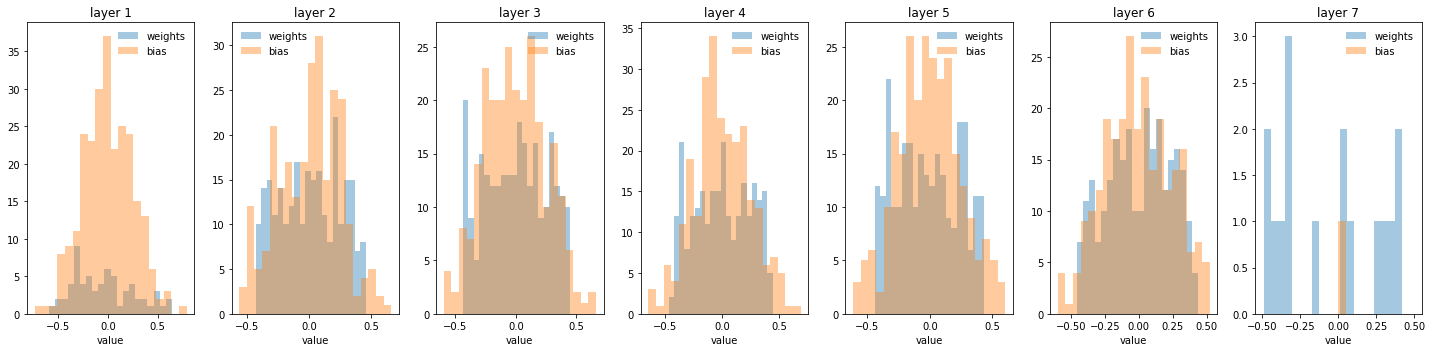

LSTM


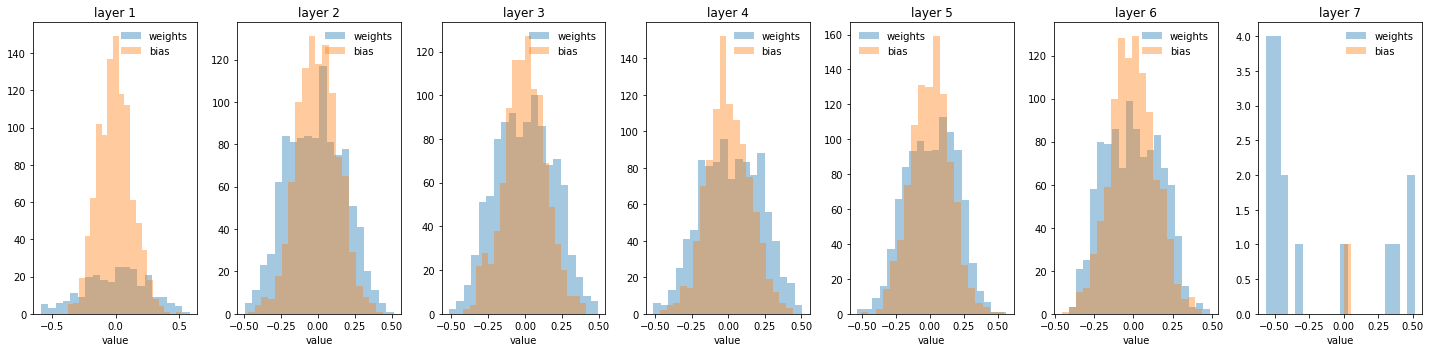

CNN+LSTM


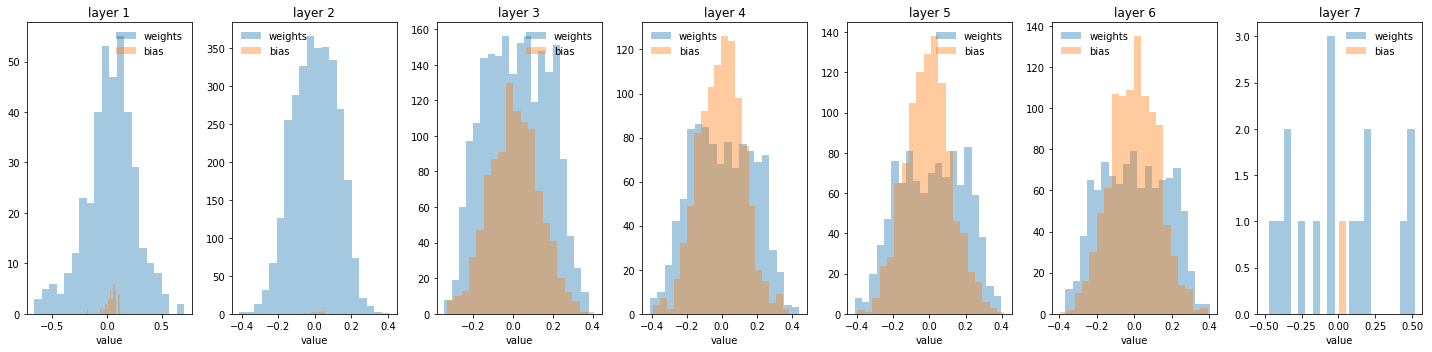

In [399]:
# visualize parameters
import seaborn as sns
## RNN and LSTM
dl_dict = {'rnn':rnn, 'lstm':lstm, 'cnn+lstm':cnn_lstm}
for k, v in dl_dict.items():
    if k != 'cnn+lstm':
        print(k.upper())
        fig = plt.figure(figsize=(20, 5))        
        for i, layer in enumerate([j for j in range(0, 7)]):
            plt.subplot(1, 7, i+1)
            w = v.layers[layer].get_weights()[0]
            b = v.layers[layer].get_weights()[1]
            sns.distplot(w.flatten(), kde=False, bins=20, label='weights')
            sns.distplot(b.flatten(), kde=False, bins=20, label='bias')
            plt.xlabel('value')
            plt.title('layer {0}'.format(i+1))
            plt.legend(loc='best', frameon=False)
        plt.tight_layout()
        plt.savefig('./img/'+k+'_params_dist.png')
        plt.show()

## CNN + LSTM
print('CNN+LSTM')
fig = plt.figure(figsize=(20, 5))
for i, layer in enumerate([0, 2, 4, 5, 6, 7, 8]):
    plt.subplot(1, 7, i+1)
    w = cnn_lstm.layers[layer].get_weights()[0]
    b = cnn_lstm.layers[layer].get_weights()[1]
    sns.distplot(w.flatten(), kde=False, bins=20, label='weights')
    sns.distplot(b.flatten(), kde=False, bins=20, label='bias')
    plt.xlabel('value')
    plt.title('layer {0}'.format(i+1))
    plt.legend(loc='best', frameon=False)
plt.tight_layout()
plt.savefig('./img/cnn+lstm_params_dist.png')
plt.show()

---
# <u>#5. Conclusion</u>
### 5-1. Free-Form Visualization
In this section, a visualization has been provided that emphasizes an important quality about the project with thorough discussion.  

In this paper, in order to verify how useful CNN is to solve time-series prediction problem, CNN, LSTM, and CNN+LSTM are build on stock datasets of Google obtained at kaggle and their predictions are compared with MSE. As a result, CNN+LSTM and LSTM's MSE are minimum adn CNN+LSTM's learning time is shortest amongst the three models. This shows that applying CNN to time-series forecasting is valid.  

Predictions by each deep learning models are visualized below. As shown below and mentioned above, LSTM and CNN+LSTM performs much better than benchmark model, RNN. In contrast to RNN as benchmark model which has less robustness, LSTM and CNN+LSTM look to have more robustness and predict better.   

As for learning time, CNN+LSTM model saves the most amongst the three model. This is because CNN can learn parallely in contrast to LSTM which  learns sequentially.  

In conclusion, employing CNN for time-series problem is valid in terms of prediction and learning speed compared to other deep learning models such as RNN and LSTM. 

||RNN  |LSTM  |CNN+LSTM  |
|---|---|---|---|
|MSE [-]|0.0017  |0.00024  |0.00024  |
|TIME [sec]|139  |196  |134  |

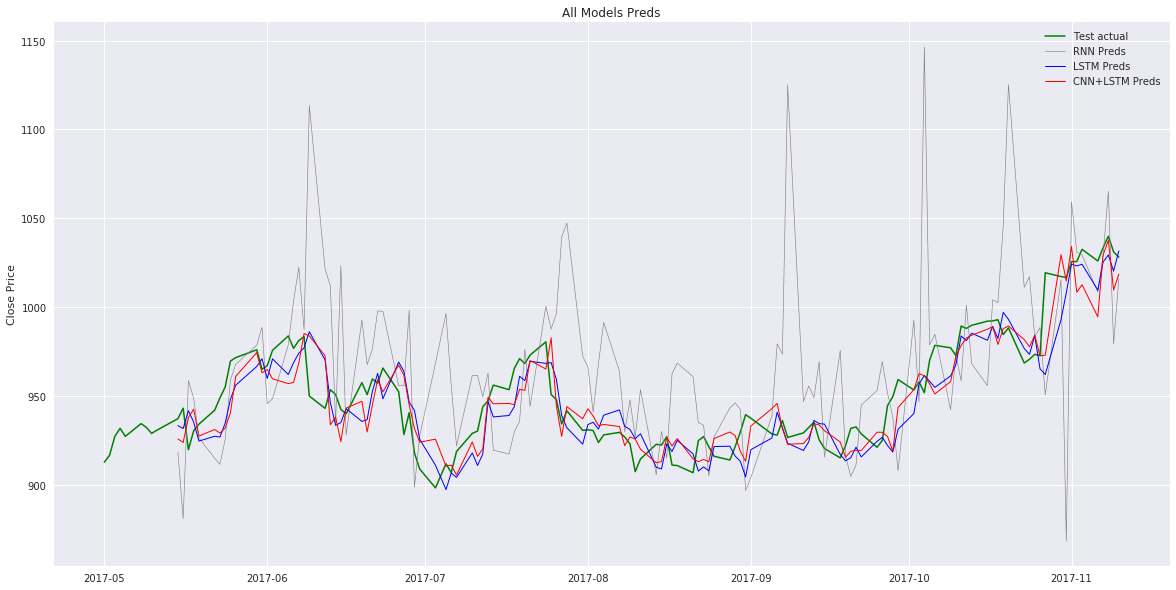

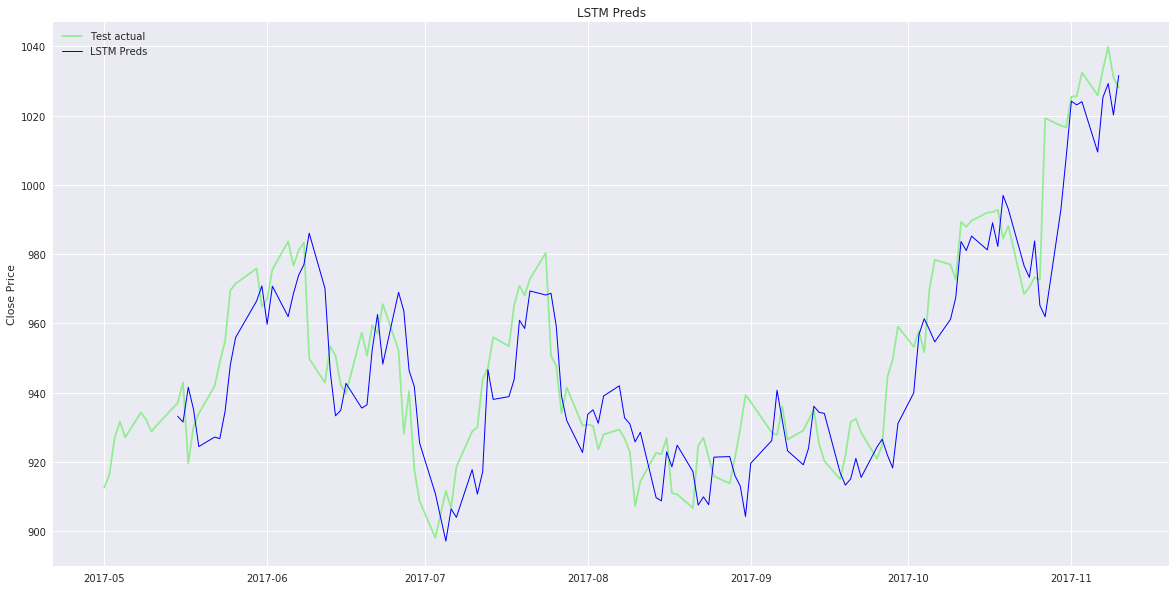

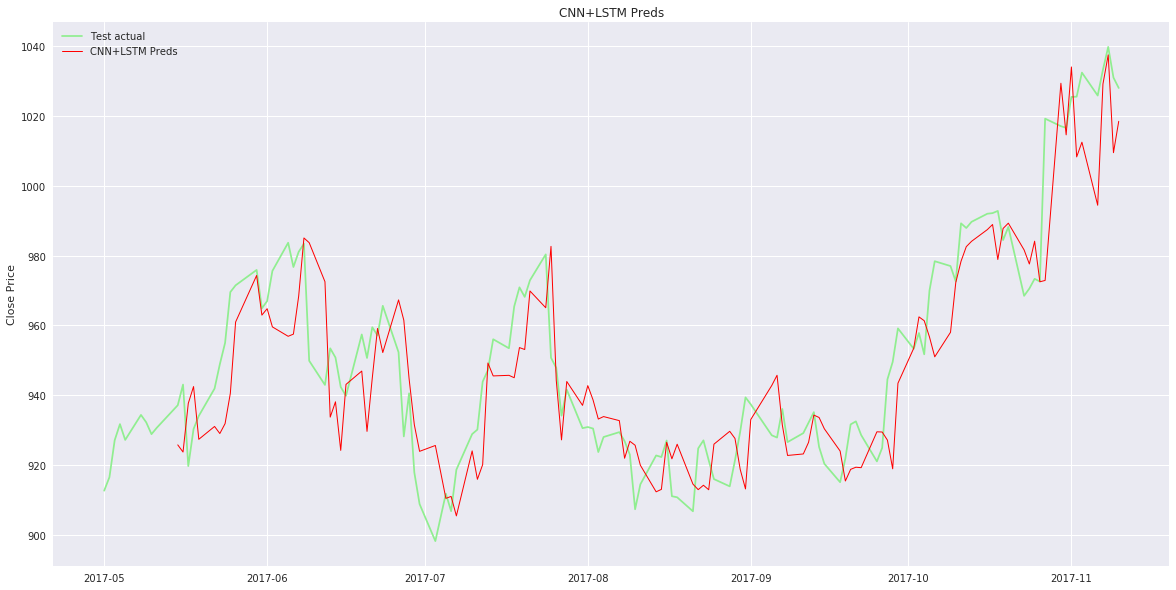

In [529]:
# visualize predictions
sns.set()

## RNN, LSTM, CNN+LSTM preds vs actual
fig = plt.figure(figsize=(20, 10))
plt.plot(X_test.index, y_test.values, label='Test actual', color='green', linewidth=1.5)
plt.plot(X_test.iloc[window:].index, ((np.transpose(rnn.predict(X_test_fin))+1.)*y_test.values[:-window])[0], label='RNN Preds', \
         color='gray', linewidth=.6, linestyle='-')
plt.plot(X_test.iloc[window:].index, ((np.transpose(lstm.predict(X_test_fin))+1.)*y_test.values[:-window])[0], label='LSTM Preds',\
         color='blue', linewidth=1., linestyle='-')
plt.plot(X_test.iloc[window:].index, ((np.transpose(cnn_lstm.predict(X_test_fin))+1.)*y_test.values[:-window])[0], label='CNN+LSTM Preds',\
         color='red', linewidth=1., linestyle='-')
plt.ylabel('Close Price'); plt.title('All Models Preds');
plt.legend(loc='best', frameon=False)
plt.savefig('./img/all_models_preds.png')
plt.show()

## LSTM preds vs actual
fig = plt.figure(figsize=(20, 10))
plt.plot(X_test.index, y_test.values, label='Test actual', color='lightgreen')
plt.plot(X_test.iloc[window:].index, ((np.transpose(lstm.predict(X_test_fin))+1.)*y_test.values[:-window])[0], label='LSTM Preds', \
         color='blue', linewidth=1., linestyle='-')
plt.ylabel('Close Price'); plt.title('LSTM Preds');
plt.legend(loc='best', frameon=False)
plt.savefig('./img/lstm_preds.png')
plt.show()

## CNN+LSTM preds vs actual
fig = plt.figure(figsize=(20, 10))
plt.plot(X_test.index, y_test.values, label='Test actual', color='lightgreen')
plt.plot(X_test.iloc[window:].index, ((np.transpose(cnn_lstm.predict(X_test_fin))+1.)*y_test.values[:-window])[0], label='CNN+LSTM Preds',\
         color='red', linewidth=1., linestyle='-')
plt.ylabel('Close Price'); plt.title('CNN+LSTM Preds');
plt.legend(loc='best', frameon=False)
plt.savefig('./img/cnn_lstm_models_preds.png')
plt.show()

### 5-2. Reflection
In this section, the end-to-end problem solution and discusses one particular aspects of the project they found interesting or difficult.  

In this paper, in order to verify how useful CNN is for time-series forecasting, RNN, LSTM, CNN+LSTM are build to predict Close price of Google from 4 features, open, high, low and volume. As a result, CNN+LSTM perform best in terms of MSE and Learning Speed.  

As for preprocessing, window is set to 10 in this paper and the values are normalized in the window datasets. After do that, all the deep learning models with 7 layers are trained on the train datasets and evaluated on the test datasets. 

As for found interesting and difficult, CNN was only used for image recognition in my learning experience. Now, it is interesting that CNN combined with LSTM is employed and CNN shows its capability to solve time-series datasets.  
In contrast to this, it is difficult to win stock trading with machine learning. As shown above, preds of 1d-CNN+LSTM and LSTM are not usefull to win the stock trading. 

Anyway, this experience to employing various deep learning models to solve this problem helps me to solve a problem with various approach. 


### 5-3. Improvement
In this section, discussion is made as to how one aspect of the implementation could be improved. 

In order to build algorithm trading system which predicts well and can win the stock price trading, theare are three potential approch. 
- Change my data: Feature engineering with the existing models. 
- Change my model and data: CNN and LSTM with one more dimension to learn the relationship between the other stock datasets such as Facebook, Apple etc. For simple example, CNN's RGB channel for image recognition is correspoding to Google, Apple, Facebook, and Amazon stock datasets. 
- Change my model: In order to 'win' trading, Deep-Reinforcement approach is usefull because it can learn policy with three actions of sell, stay, buy. 

I appreciate your spending time on my papaer.  
Sincerely,  
[Masaharu Kinoshita](https://www.linkedin.com/in/masaharu-kinoshita/), a newly-fladged data scientist at IBM Japan